In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ocean_data.csv')


In [4]:
df = df[['Depthm', 'T_degC','O2ml_L', 'STheta','O2Sat', 'Oxy_µmol/Kg','PO4uM', 'SiO3uM','NH3uM','R_Depth', 'R_TEMP', 'R_POTEMP',
            'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat','R_SIO3', 'R_PO4', 'R_NO3','R_PRES', 'Salnty']]

## Data description

T_degC: Temperature of Water

Depthm: Depth in meters

O2ml_L: Milliliters of dissolved oxygen per Liter seawater

STheta: Potential Density of Water

O2Sat: Oxygen Saturation

Oxy_µmol/Kg: Oxygen in micro moles per kilogram of seawater

PO4uM: Phosphate concentration

SiO3uM: Silicate concentration

NH3uM: Ammonium concentration

R_Depth: Reported Depth in Meters

R_TEMP: Reported Temperature

R_POTEMP: Reported Potential Temperature

R_SALINITY: Reported Salinity

R_SIGMA: Reported Potential Density of water

R_SVA: Reported Specific Volume Anomaly

R_DYNHT: Reported Dynamic Height

R_O2: Reported milliliters of oxygen per liter of seawater

R_O2Sat:Reported Oxygen Saturation

R_SIO3: Reported Silicate Concentration

R_PO4: Reported Phosphate Concentration

R_NO3: Reported Nitrate Concentration

R_PRES: Pressure in decibars

STheta: Potential Density of Water

O2Sat: Oxygen Saturation

Oxy_µmol/Kg: Oxygen in micro moles per kilogram of seawater

Salnty: Salinity of water

In [5]:
df.shape

(864863, 23)

In [6]:
#Replace the NaN values with the mean
for i in df.columns:
    df[i] = df[i].fillna((df[i].mean()))

In [7]:
df.isnull().sum()

Depthm         0
T_degC         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
PO4uM          0
SiO3uM         0
NH3uM          0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_SIO3         0
R_PO4          0
R_NO3          0
R_PRES         0
Salnty         0
dtype: int64

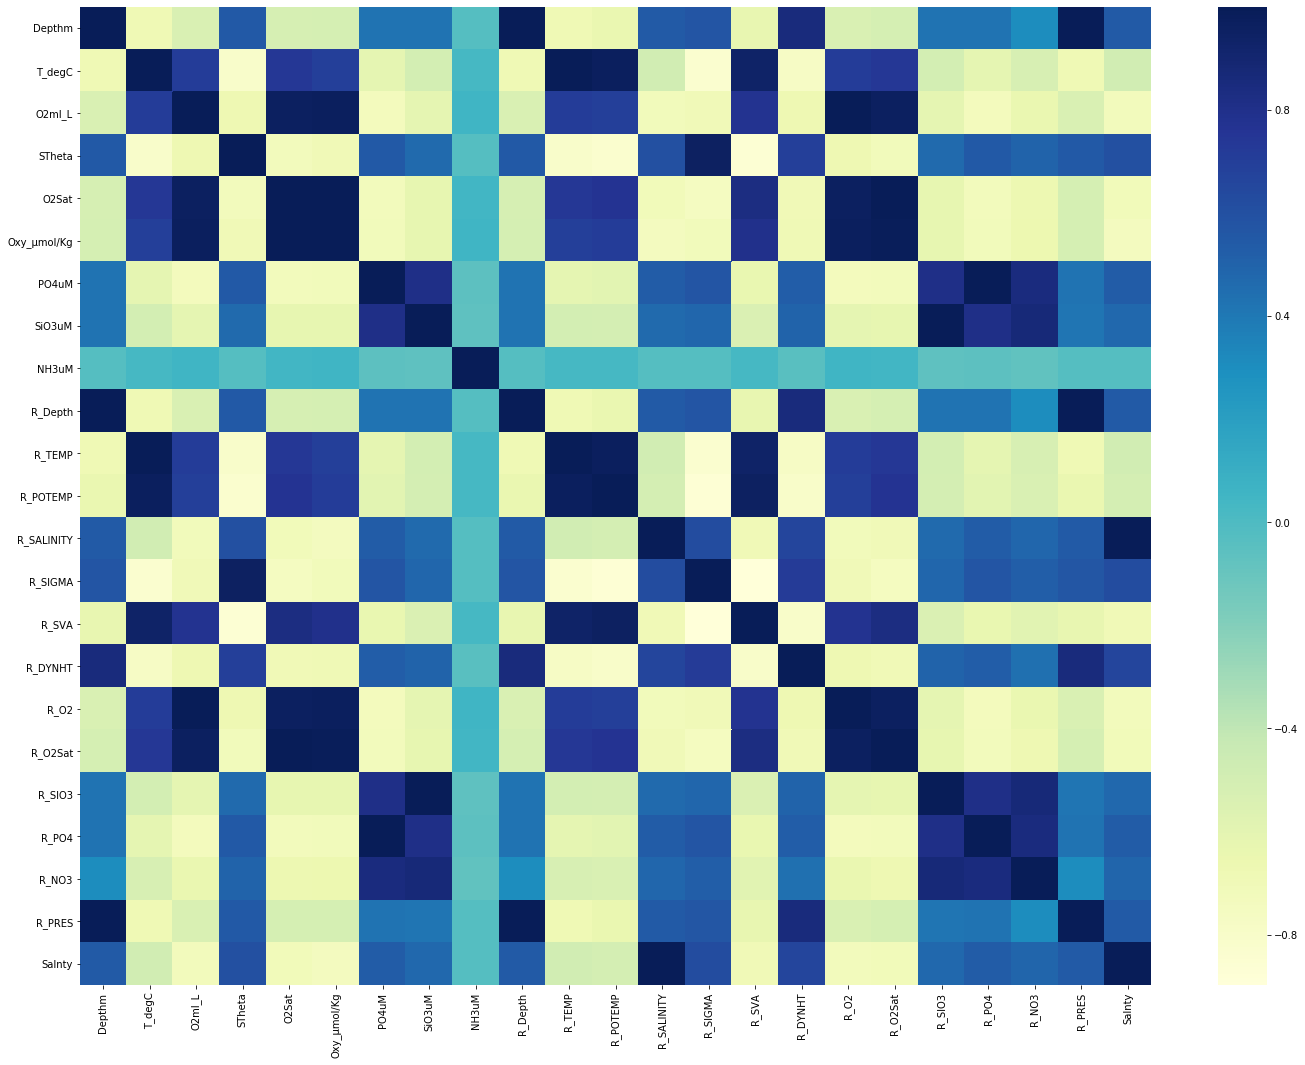

In [8]:
cor = df.corr()
fig = plt.figure(figsize = (24, 18))

#Plotting the heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

#Everyone except for NH3uM is correlated with salinity

## PCA

In [9]:
df.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM',
       'SiO3uM', 'NH3uM', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4',
       'R_NO3', 'R_PRES', 'Salnty'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components= df.shape[1])

pc = pca.fit_transform(X_scaled)

In [12]:
eigen_values = pca.explained_variance_
eigen_values

array([1.49826967e+01, 2.50630924e+00, 1.49532034e+00, 1.30390441e+00,
       9.94843425e-01, 6.83230189e-01, 3.51044978e-01, 2.78553509e-01,
       1.44656966e-01, 1.21101922e-01, 6.38033645e-02, 3.82211081e-02,
       1.73241355e-02, 8.63730772e-03, 6.13067651e-03, 2.54279084e-03,
       1.66390750e-03, 3.57306734e-05, 2.90843059e-06, 1.65073984e-06,
       1.27154784e-06, 9.29974218e-09, 2.69431354e-09])

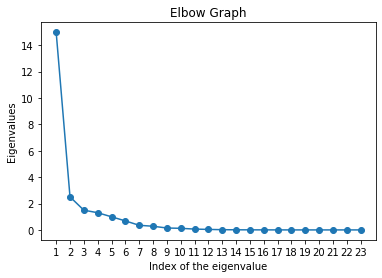

In [13]:
#elbow graph

possibilities = range(1, 24)

plt.plot(possibilities, eigen_values, '-o')
plt.xlabel('Index of the eigenvalue')
plt.ylabel('Eigenvalues')
plt.xticks(possibilities)
plt.title('Elbow Graph')
plt.show()

In [14]:
np.cumsum(pca.explained_variance_ratio_)
#We can use only 3 components

array([0.65142084, 0.76039069, 0.82540454, 0.88209597, 0.92534998,
       0.95505561, 0.97031841, 0.98242942, 0.98871885, 0.99398414,
       0.9967582 , 0.99841998, 0.99917321, 0.99954874, 0.99981529,
       0.99992585, 0.99999819, 0.99999975, 0.99999987, 0.99999994,
       1.        , 1.        , 1.        ])

In [15]:
pca = PCA(n_components= 3)

pc = pca.fit_transform(X_scaled)

In [16]:
pca.components_

array([[ 0.18732166, -0.22505325, -0.23336546,  0.2130925 , -0.23740164,
        -0.2339168 ,  0.20645225,  0.18677273, -0.01396173,  0.18732158,
        -0.22505336, -0.22569712,  0.19615722,  0.22016628, -0.23885806,
         0.21872479, -0.23336556, -0.23724591,  0.18677547,  0.20645533,
         0.18770558,  0.18697482,  0.19658731],
       [ 0.33119054, -0.16178813,  0.10464165,  0.10724348,  0.10019552,
         0.11265089, -0.28089525, -0.29637137,  0.03906764,  0.33118986,
        -0.16178834, -0.14855119,  0.00194552,  0.10850688, -0.10027648,
         0.23374205,  0.10464196,  0.10204868, -0.29636793, -0.28089307,
        -0.34396739,  0.33147947,  0.00194543],
       [-0.32344499, -0.05722852, -0.18334542,  0.18202721, -0.21442393,
        -0.21038805, -0.17329501, -0.34689091,  0.04338002, -0.32344544,
        -0.05722869, -0.08945825,  0.1191186 ,  0.1808968 , -0.15392143,
        -0.118767  , -0.18334425, -0.21202957, -0.34688438, -0.17328926,
        -0.18392013, -0.3245

In [17]:
#Loadings

result = (pca.components_.T * np.sqrt(pca.explained_variance_)).T
result

array([[ 0.72507509, -0.87112463, -0.9032991 ,  0.82482756, -0.91892211,
        -0.90543318,  0.79912481,  0.72295034, -0.05404234,  0.7250748 ,
        -0.87112504, -0.87361687,  0.75927534,  0.85220836, -0.92455958,
         0.84662871, -0.90329946, -0.91831935,  0.72296094,  0.79913674,
         0.72656114,  0.72373258,  0.76094012],
       [ 0.52431858, -0.25613208,  0.16566162,  0.16978066,  0.1586228 ,
         0.17834132, -0.44469446, -0.46919521,  0.06184926,  0.52431751,
        -0.25613242, -0.23517624,  0.00308002,  0.17178079, -0.15875098,
         0.37004468,  0.16566211,  0.1615566 , -0.46918976, -0.44469101,
        -0.54454603,  0.524776  ,  0.00307987],
       [-0.39551918, -0.06998092, -0.22420082,  0.22258886, -0.26220464,
        -0.25726944, -0.21191084, -0.42418963,  0.05304651, -0.39551973,
        -0.06998113, -0.10939249,  0.14566214,  0.22120656, -0.18822019,
        -0.1452322 , -0.22419939, -0.25927673, -0.42418164, -0.21190381,
        -0.22490359, -0.3968

In [18]:
df_result = pd.DataFrame(result, columns=df.columns) 
df_result

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,NH3uM,R_Depth,...,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_PRES,Salnty
0,0.725075,-0.871125,-0.903299,0.824828,-0.918922,-0.905433,0.799125,0.722950,-0.054042,0.725075,...,0.852208,-0.924560,0.846629,-0.903299,-0.918319,0.722961,0.799137,0.726561,0.723733,0.760940
1,0.524319,-0.256132,0.165662,0.169781,0.158623,0.178341,-0.444694,-0.469195,0.061849,0.524318,...,0.171781,-0.158751,0.370045,0.165662,0.161557,-0.469190,-0.444691,-0.544546,0.524776,0.003080
2,-0.395519,-0.069981,-0.224201,0.222589,-0.262205,-0.257269,-0.211911,-0.424190,0.053047,-0.395520,...,0.221207,-0.188220,-0.145232,-0.224199,-0.259277,-0.424182,-0.211904,-0.224904,-0.396871,0.145601


In [19]:
df.columns

Index(['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM',
       'SiO3uM', 'NH3uM', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4',
       'R_NO3', 'R_PRES', 'Salnty'],
      dtype='object')

## Linear Regression

In [20]:
#With 2 variables
features = 'Salnty'
#features = ['T_degC','Salnty', 'STheta', 'R_TEMP', 'R_POTEMP']
target = 'T_degC'

In [21]:
#Let's limit our sample
df = df[:][:500]

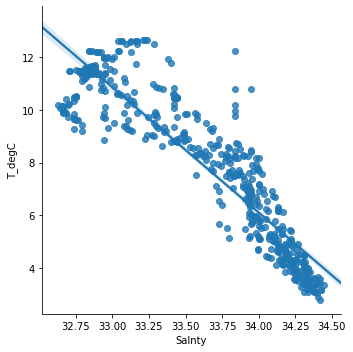

In [22]:
sns.lmplot(x = features, y = target, data = df, order = 1) #, ci = None

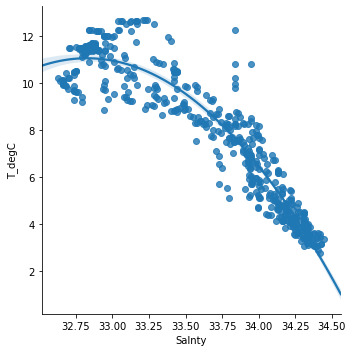

In [23]:
sns.lmplot(x = features, y = target, data = df, order = 2) #, ci = None

In [24]:
import statsmodels.formula.api as smf
#Load 'summary_col' to help us summarize multiple results instances side-by-side.
from statsmodels.iolib.summary2 import summary_col

m = smf.ols('T_degC ~ Salnty', data = df).fit()

summary_col([m],
            info_dict = {'N': lambda x: "{0:d}".format(int(x.nobs)),
                         'R2': lambda x: "{:.2f}".format(x.rsquared)})

,T_degC
Intercept,167.9218
,(3.2411)
Salnty,-4.7594
,(0.0964)
N,500
R2,0.83


In [51]:
X = np.array(df['Salnty']).reshape(-1, 1)
y = np.array(df['T_degC']).reshape(-1, 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [53]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
model.score(X_test, y_test)

0.8540901616288988

In [55]:
X_train = np.transpose(X_train)[0]
y_train = np.transpose(y_train)[0]

X_train

array([34.13      , 33.58      , 33.95      , 33.15      , 33.565     ,
       34.34      , 33.936     , 33.585     , 33.806     , 34.321     ,
       34.352     , 33.431     , 34.25      , 32.842     , 33.8       ,
       33.84      , 33.86      , 33.874     , 32.709     , 32.827     ,
       34.354     , 33.942     , 33.957     , 32.798     , 32.74      ,
       33.356     , 33.243     , 33.605     , 34.342     , 34.113     ,
       34.42      , 34.11      , 34.16      , 32.803     , 33.82      ,
       34.31      , 33.934     , 34.385     , 33.42      , 34.2       ,
       34.374     , 34.134     , 34.226     , 33.898     , 34.135     ,
       33.84035029, 32.858     , 33.495     , 34.        , 33.732     ,
       32.863     , 33.955     , 33.84035029, 32.769     , 33.033     ,
       33.951     , 33.533     , 34.332     , 32.86      , 34.        ,
       33.833     , 34.332     , 33.272     , 33.95      , 34.101     ,
       33.437     , 33.73      , 34.13      , 33.1       , 33.94

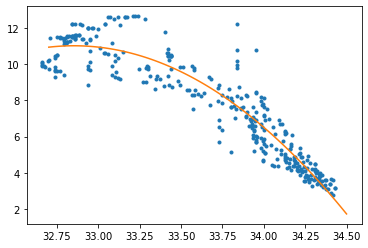

In [65]:
z = np.polyfit(X_train,y_train,2)
p = np.poly1d(z)
xp = np.linspace(32.7, 34.50, 100)
plt.plot(X_train, y_train, '.', xp, p(xp), '-')

In [68]:
yhat = p(X_test)
ybar = np.sum(y_test)/len(y_test)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((y_test - ybar)**2)
ssreg / sstot

0.8853607198770909

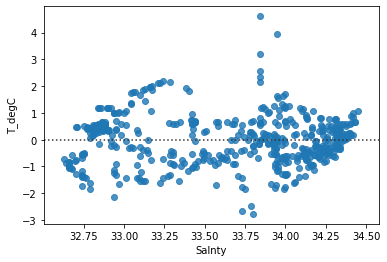

In [69]:
# Residual plot - to check for heteroscedasticity 
sns.residplot(df['Salnty'], df['T_degC'], order = 2) #,lowess=True)

#It means that the erros u

## Multilinear Regression Model

In [78]:
target = 'T_degC'

#features = ['Salnty', 'STheta', 'R_TEMP', 'R_POTEMP']

features = ['Salnty', 'STheta','O2Sat', 'Oxy_µmol/Kg']

In [79]:
x = df[features]
y = df[target]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [81]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9903607477867972


Is this for real? Almost 100%?

In [83]:
y_pred = model.predict(X_test)

In [84]:
#for i in range(150):
    #print('Actual value: {:.3f} Predicted Value: {:.3f}'.format(y_test.values[i],y_pred[i]))

In [85]:
#Evidence that the model is correct, done in plotly


import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go


trace = go.Scatter(x = y_test.values, y = y_pred, marker = dict(color = 'black'))

layout = go.Layout(title=go.layout.Title(
                    text='Predicted Vs Real (Salinity) ',
                    xref='paper',
                    x=0
                    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Actual Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Predicted Values',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='results')


<img src="accuracy_model.png">